# Lab_1

In [35]:
from sympy import *
y=x**3-2*x+100
x=Symbol('x')
y.diff(x)

3*x**2 - 2

[2.   0.   0.4  0.7  0.81 0.82 0.82 0.82 0.82 0.82 0.82]


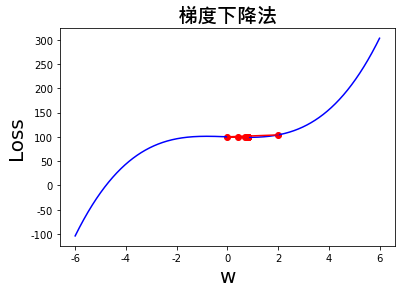

In [75]:
#研究出start必須在0~2且不可超過range形成一個馬鞍線找最小值而epochs&learning值可做適當更改測試找到0.82
import numpy as np
import matplotlib.pyplot as plt
def func(x): return x**3-2*x+100 #np.square(x)
# 目標函數的一階導數:dy/dx=3*x**2-2
def dfunc(x): return 3*x**2-2
def GD(x_start, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
     """    
    xs = np.zeros(epochs+1)    
    w = x_start    
    xs[0] = w    
    for i in range(epochs):         
        dx = df(w)        
        # 權重的更新W_new
        # W_new = W — learning_rate * gradient        
        w += - dx * lr         
        xs[i+1] = w    
    return xs

# Main, 超參數(Hyperparameters)
# 起始權重
x_start =2    
# 執行週期數
epochs=10 
# 學習率   
lr = 0.2   
# 梯度下降法 
# *** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr=lr) 
print (np.around(w, 2))
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c=color, label='lr={}'.format(lr))    
plt.scatter(w, func(w), c=color, ) 

# 設定中文字型
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msjhbd.ttc", size=20)   
plt.title('梯度下降法', fontproperties=font)
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)

# 矯正負號
plt.rcParams['axes.unicode_minus'] = False

plt.show()

In [4]:
from sympy import *
x=Symbol('x')
y= -(-5*x**2+3*x+6)
y.diff(x)

10*x - 3

[ 0.   0.6 -0.   0.6 -0.   0.6 -0.   0.6 -0.   0.6 -0.   0.6 -0.   0.6
 -0.   0.6 -0.   0.6 -0.   0.6 -0.   0.6 -0.   0.6 -0.   0.6 -0.   0.6
 -0.   0.6 -0.   0.6 -0.   0.6 -0.   0.6 -0.   0.6 -0.   0.6 -0.   0.6
 -0.   0.6 -0.   0.6]


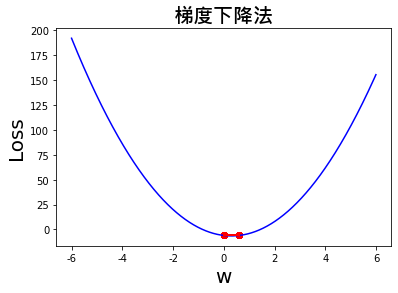

In [18]:
#研究出最大值在測試學習率l=0~0.2的跨出步伐所以不乏不可超過0.2否則找不到最大值(max),epochs在50時可找到max值-1.4 or 0.6
import numpy as np
import matplotlib.pyplot as plt
# 目標函數(損失函數):y=-5*x**2+3*x+6
def func(x): return -(-5*x**2+3*x+6) #np.square(x)

# 目標函數的一階導數:dy/dx=3*x-10
def dfunc(x): return 10*x-3

def GD(x_start, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
     """    
    xs = np.zeros(epochs+1)    
    w = x_start    
    xs[0] = w    
    for i in range(epochs):         
        dx = df(w)        
        # 權重的更新W_new
        # W_new = W — learning_rate * gradient        
        w += - dx * lr         
        xs[i+1] = w    
    return xs

# Main, 超參數(Hyperparameters)
# 起始權重
x_start = 0    
# 執行週期數
epochs =45
# 學習率   
lr=0.2 
# 梯度下降法 
# *** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr=lr) 
print (np.around(w, 2))
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c=color, label='lr={}'.format(lr))    
plt.scatter(w, func(w), c=color, ) 

# 設定中文字型
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msjhbd.ttc", size=20)   
plt.title('梯度下降法', fontproperties=font)
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)

# 矯正負號
plt.rcParams['axes.unicode_minus'] = False

plt.show()

# Lab_2

In [93]:
from sympy import *
x=Symbol('x')
y=2*x**4-3*x**2+2*x-20
y.diff(x)

8*x**3 - 6*x + 2

[ 0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


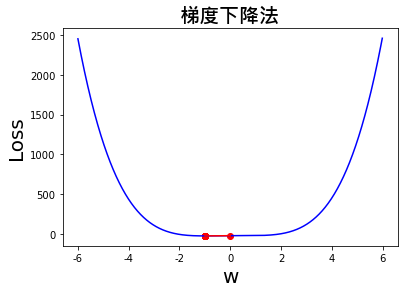

In [102]:
#研究出start必須在0~1的range內而learning必須在0.5使值不會出現overflow error找到固定-1的最小值
import numpy as np

import matplotlib.pyplot as plt

# 目標函數(損失函數):y=2x^4-3x^2+2x-20 
def func(x): return 2*x**4-3*x**2+2*x-20 #np.square(x)

# 目標函數的一階導數:dy/dx=2*x
def dfunc(x): return 8*x**3-6*x+2
def GD(x_start, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
     """    
    xs = np.zeros(epochs+1)    
    w = x_start    
    xs[0] = w    
    for i in range(epochs):         
        dx = df(w)        
        # 權重的更新W_new
        # W_new = W — learning_rate * gradient        
        w += - dx * lr         
        xs[i+1] = w    
    return xs

# Main, 超參數(Hyperparameters)
# 起始權重
x_start = 0    
# 執行週期數
epochs =10 
# 學習率   
lr = 0.5   
# 梯度下降法 
# *** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr=lr) 
print (np.around(w, 2))
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c=color, label='lr={}'.format(lr))    
plt.scatter(w, func(w), c=color, ) 

# 設定中文字型
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msjhbd.ttc", size=20)   
plt.title('梯度下降法', fontproperties=font)
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)

# 矯正負號
plt.rcParams['axes.unicode_minus'] = False

plt.show()

# Lab_3

[ 1.    0.77  0.42 ... -1.22 -1.22 -1.22]


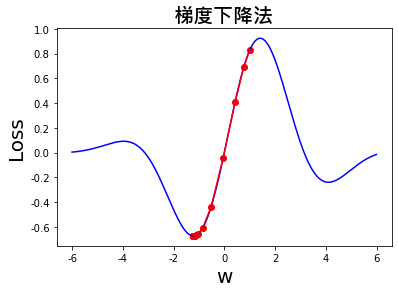

In [151]:
#研究改變epochs>=1000的值可精準求出minimum
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
x = Symbol('x')
y = sin(x)* E ** (-0.1*(x-0.6)**2)
yprime= y.diff(x)
# 目標函數(損失函數)
def func(x): return np.sin(x)*np.exp(-0.1*(x-0.6)**2) #np.square(x)

# 目標函數的一階導數:dy/dx
def dfunc(x_value): return yprime.subs(x, x_value).evalf()

def GD(x_start, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
     """    
    xs = np.zeros(epochs+1)    
    w = x_start    
    xs[0] = w    
    for i in range(epochs):         
        dx = df(w)        
        # 權重的更新W_new
        # W_new = W — learning_rate * gradient        
        w += - dx * lr
        xs[i+1]= w    
    return xs

# Main, 超參數(Hyperparameters)
# 起始權重
x_start =1 
# 執行週期數
epochs = 2000
# 學習率   
lr = 0.5  
# 梯度下降法 
# *** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr=lr)
print (np.around(w, 2))
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c=color, label='lr={}'.format(lr))    
plt.scatter(w, func(w), c=color, ) 

# 設定中文字型
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msjhbd.ttc", size=20)   
plt.title('梯度下降法', fontproperties=font)
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)

# 矯正負號
plt.rcParams['axes.unicode_minus'] = False

plt.show()